In [1]:
# %pip install numpy scipy matplotlib

In [2]:
import numpy as np
from scipy.signal import convolve, deconvolve, windows
import matplotlib.pyplot as plt

In [3]:
spike_train = np.zeros(100)
spike_train[[10, 30, 50, 70]] = 1

### 1. General Convolution (No Calcium Kernel)

In calcium imaging, deconvolution is used to recover spike trains from fluorescence signals, which are smoothed out due to the physical properties of calcium indicators. To understand this better, we can begin by looking at general convolution. A spike train, when passed through a smoothing kernel, gets blurred across time. This simulates how transient events get spread out, making it harder to identify when exactly spikes occurred. Longer the kernel window, smoother the resulting trace.

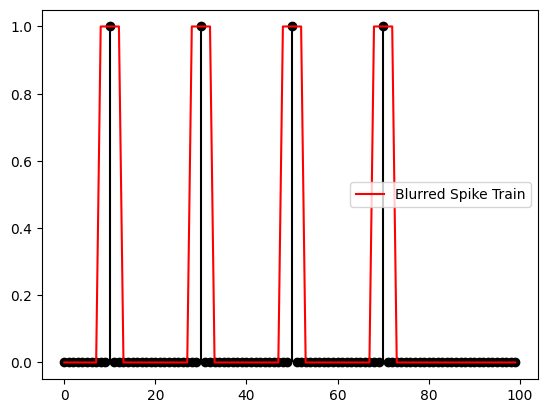

In [4]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(5)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

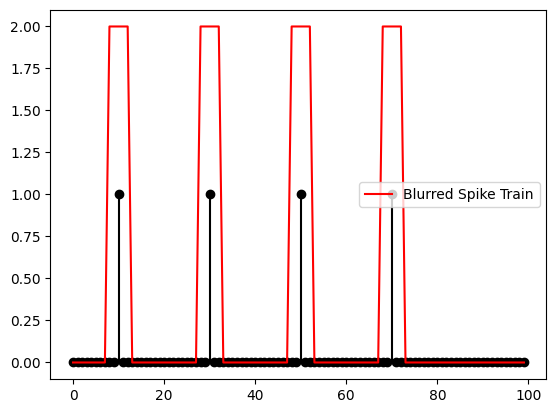

In [5]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(5)
blurred_spike_train = convolve(spike_train, kernel*2, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

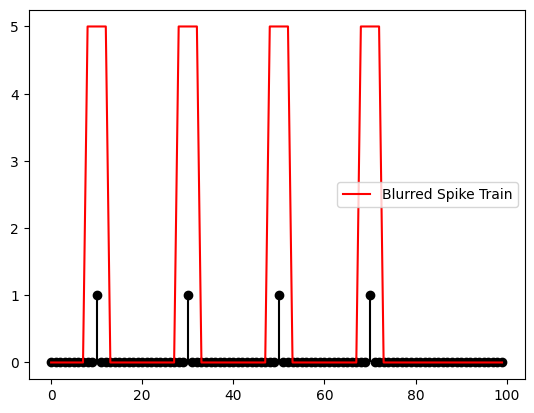

In [6]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(5)
blurred_spike_train = convolve(spike_train, kernel*5, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

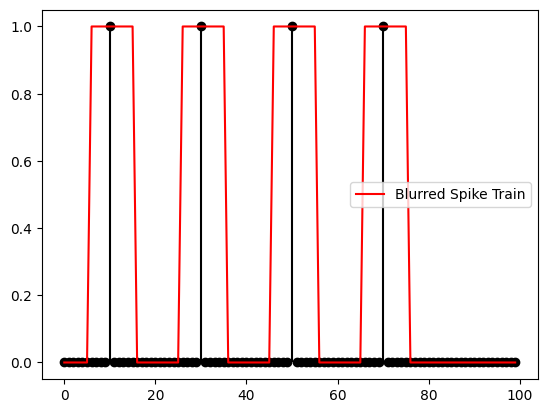

In [7]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(10)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

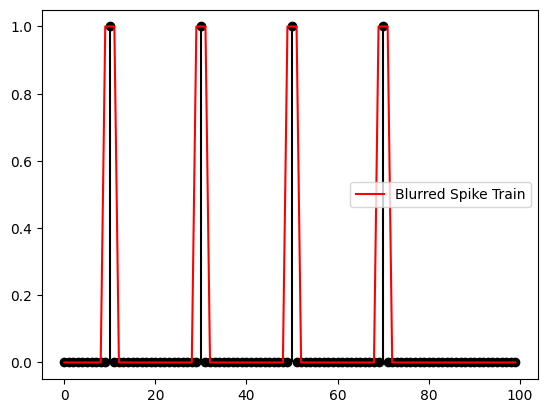

In [8]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(3)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

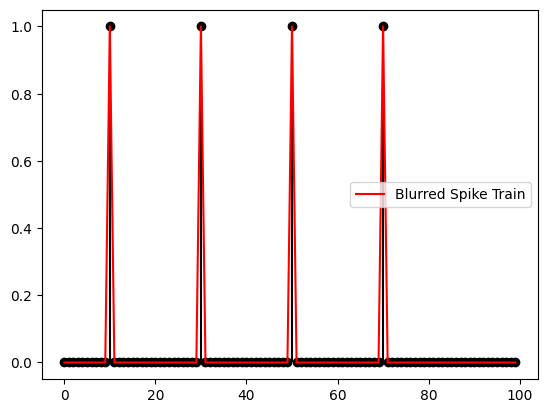

In [9]:
# Boxcar (moving average) kernel

kernel = windows.boxcar(1)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

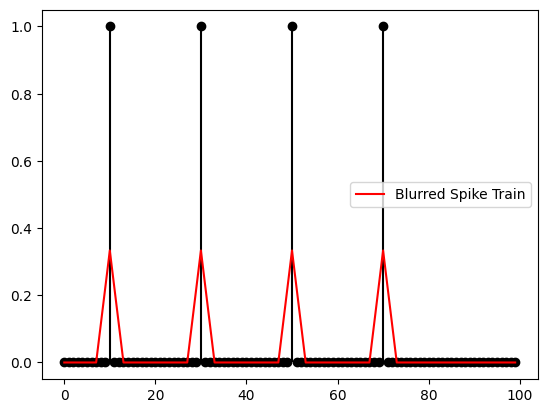

In [10]:
# Triangular kernel

kernel = np.array([1, 2, 3, 2, 1], dtype=float)
kernel = kernel / kernel.sum()
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

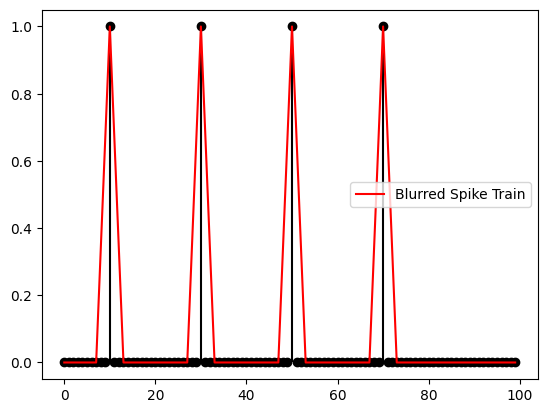

In [11]:
# Triangular kernel

kernel = windows.triang(5)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

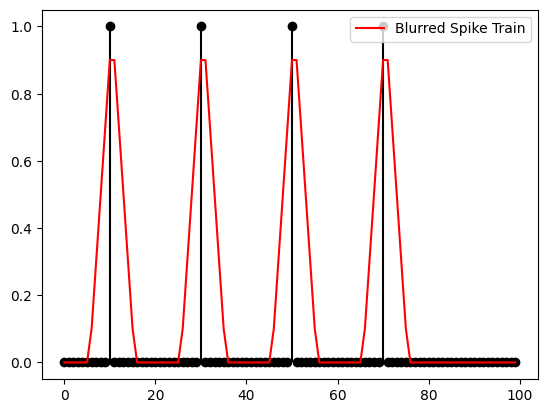

In [12]:
# Triangular kernel

kernel = windows.triang(10)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

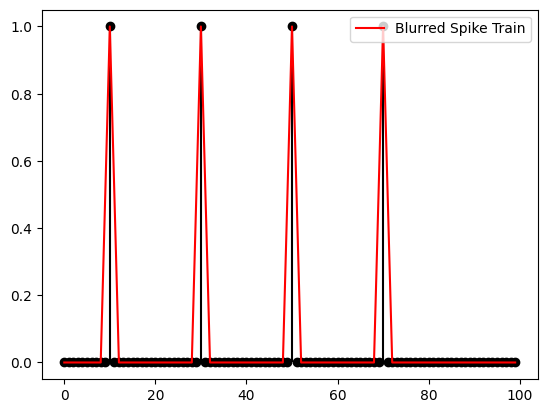

In [13]:
# Triangular kernel

kernel = windows.triang(3)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

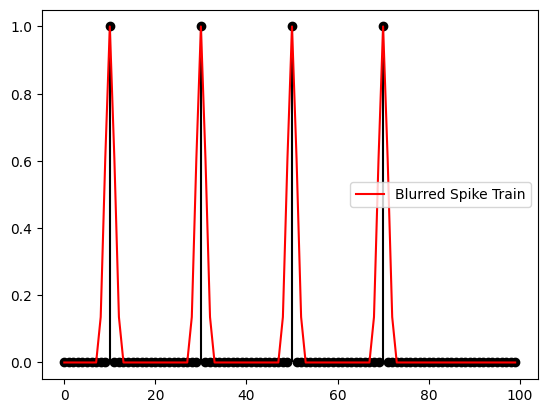

In [14]:
# Gaussian kernel
kernel = windows.gaussian(5, std=1)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

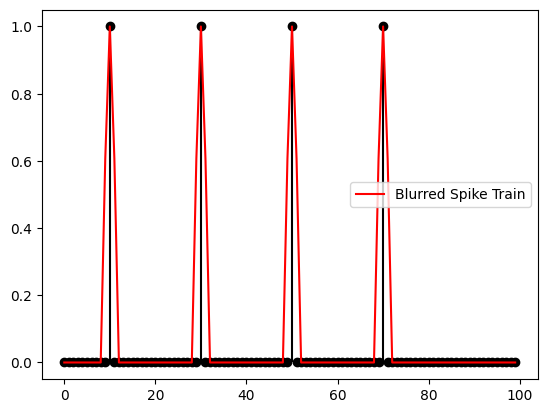

In [15]:
# Gaussian kernel
kernel = windows.gaussian(3, std=1)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

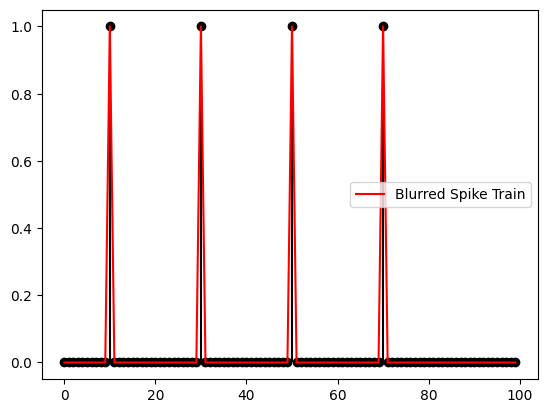

In [16]:
# Gaussian kernel
kernel = windows.gaussian(1, std=1)
blurred_spike_train = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(blurred_spike_train, color='r', label='Blurred Spike Train')
plt.legend()

### 2. Convolution with Calcium Spike Transient Kernel

In real-world calcium imaging, the fluorescence signal doesn’t just blur — it follows a specific pattern: a fast rise and slow decay. This pattern reflects the biophysical behavior of calcium inside the cell, where calcium ions rapidly enter following a spike, but take time to be cleared out. As a result, the calcium concentration increases quickly, then decays gradually. The fluorescence signal, which tracks these calcium levels, mirrors this dynamic and gives rise to the characteristic shape of calcium spike transients. A calcium spike transient kernel is a mathematical function that models this response to a single spike, capturing the fast onset and slower return to baseline seen in the data. When the decay is slow, each spike leaves a longer-lasting trace, increasing the likelihood of overlap between transients if spikes occur in rapid succession. In contrast, faster decay allows the signal to return to baseline more quickly, making individual spikes easier to distinguish in the recorded trace.

In [17]:
spike_train = np.zeros(100)
spike_train[[10, 14, 18, 22, 75, 90, 92, 95]] = 1

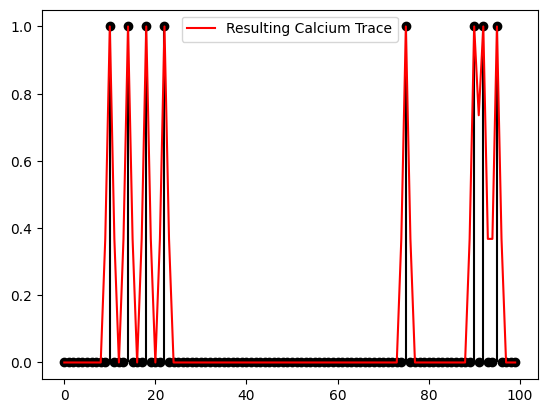

In [18]:
kernel = windows.exponential(3)
calcium_trace = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(calcium_trace, color='r', label='Resulting Calcium Trace')
plt.legend()

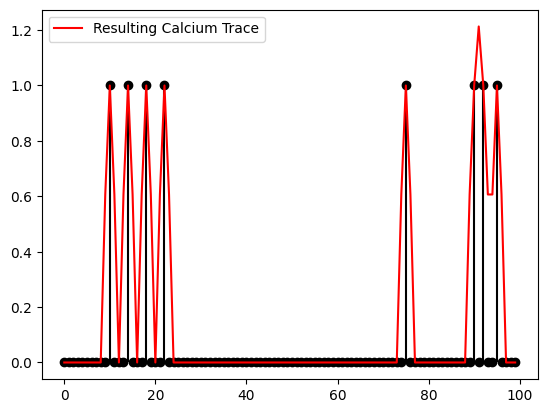

In [19]:
kernel = windows.exponential(3, tau=2)
calcium_trace = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(calcium_trace, color='r', label='Resulting Calcium Trace')
plt.legend()

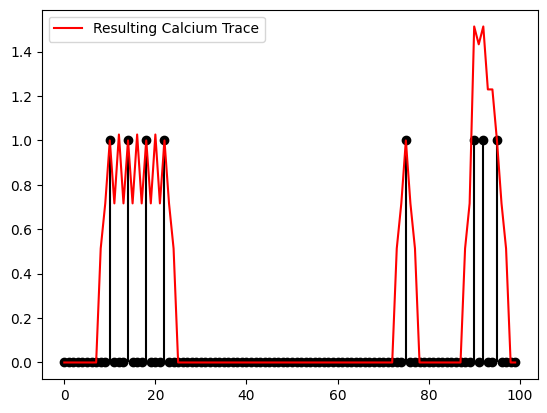

In [20]:
kernel = windows.exponential(5, tau=3)
calcium_trace = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(calcium_trace, color='r', label='Resulting Calcium Trace')
plt.legend()

In [21]:
spike_train = np.zeros(1000)
spike_train[np.random.choice(1000, size=150, replace=False)] = 1

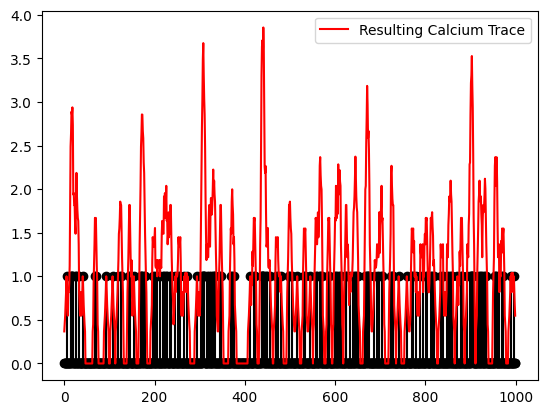

In [22]:
kernel = windows.exponential(11, tau=5)
calcium_trace = convolve(spike_train, kernel, mode='same')

plt.stem(range(len(spike_train)), spike_train, basefmt=" ", linefmt='k-', markerfmt='ko')
plt.plot(calcium_trace, color='r', label='Resulting Calcium Trace')
plt.legend()

### 3. Deconvolution using `scipy.signal.deconvolve`
Deconvolution is the mathematical process of reversing convolution. In calcium imaging, this is essential for recovering spike trains from observed signals that have been blurred by the calcium response. `scipy.signal.deconvolve` offers a simple way to attempt this reversal when the convolution kernel is known.

This section demonstrates how deconvolution can approximate the original spike train from a calcium trace.

In [48]:
n_points = 50  # Number of time steps
spike_train = np.random.binomial(1, 0.2, size=n_points)

<StemContainer object of 3 artists>

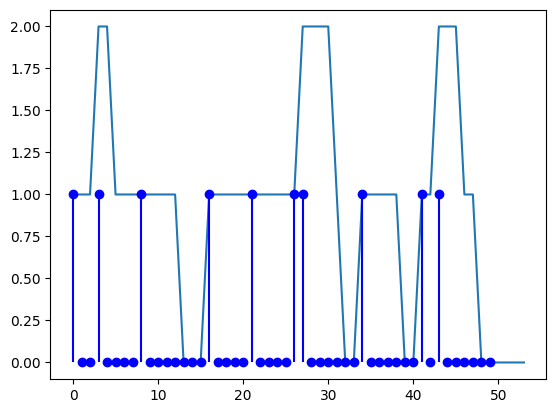

In [57]:
kernel = windows.boxcar(5)
calcium_trace = convolve(spike_train, kernel, mode='full')
estimated_spikes, _ = deconvolve(calcium_trace, kernel)

plt.plot(range(len(calcium_trace)), calcium_trace)
plt.stem(range(len(estimated_spikes)), estimated_spikes, basefmt=" ", linefmt='b-', markerfmt='bo')

<StemContainer object of 3 artists>

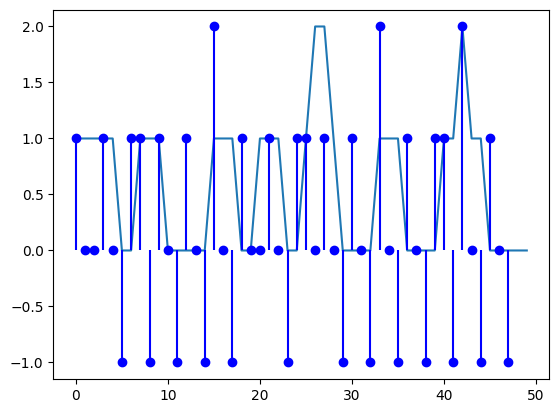

In [ ]:
kernel = windows.boxcar(3)
calcium_trace = convolve(spike_train, kernel, mode='full')
estimated_spikes, _ = deconvolve(calcium_trace, kernel)

plt.plot(range(len(calcium_trace)), calcium_trace)
plt.stem(range(len(estimated_spikes)), estimated_spikes, basefmt=" ", linefmt='b-', markerfmt='bo')

<StemContainer object of 3 artists>

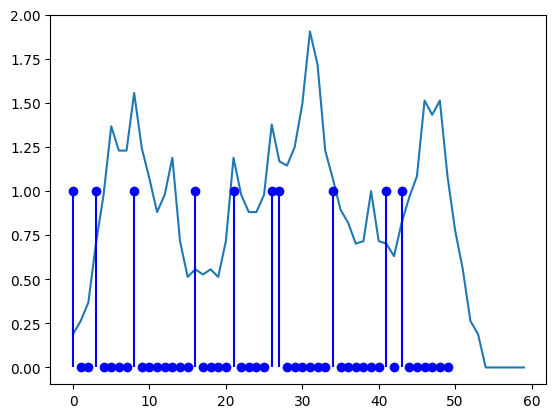

In [52]:
kernel = windows.exponential(11, tau=3.)
calcium_trace = convolve(spike_train, kernel, mode='full')
estimated_spikes, _ = deconvolve(calcium_trace, kernel)

plt.plot(range(len(calcium_trace)), calcium_trace)
plt.stem(range(len(estimated_spikes)), estimated_spikes, basefmt=" ", linefmt='b-', markerfmt='bo')

### 4. AR(1) and AR(2) Models
Calcium dynamics can also be described using autoregressive (AR) models. These models simulate how calcium at a given time point depends on previous time points, which helps approximate decay behavior mathematically. An AR(1) model only looks at the last time point, while an AR(2) model looks at the last two.

In [26]:
# Spike train
spike_train = np.zeros(100)
spike_train[[10, 40, 70]] = 1

# AR(1) calcium model
c_ar1 = np.zeros_like(spike_train)
g1 = 0.9
for t in range(1, len(spike_train)):
    c_ar1[t] = g1 * c_ar1[t-1] + spike_train[t]

# AR(2) calcium model
c_ar2 = np.zeros_like(spike_train)
g1, g2 = 1.5, -0.7
for t in range(2, len(spike_train)):
    c_ar2[t] = g1 * c_ar2[t-1] + g2 * c_ar2[t-2] + spike_train[t]

<StemContainer object of 3 artists>

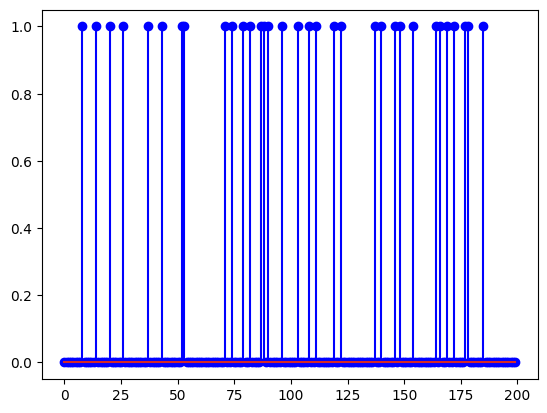

In [27]:
n_points = 200  # Number of time steps
decay_factor = 0.9  # AR(1) coefficient (how much the previous value influences the next)
spike_strength = 1.0  # Magnitude of calcium increase due to spikes
noise_std = 0.05  # Standard deviation of noise

# Generate spike train (random spikes with probability 0.2)
spike_train = np.random.binomial(1, 0.2, size=n_points)

plt.stem(range(n_points), spike_train, linefmt='b-', markerfmt='bo')